In [27]:
# import the required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from scipy import sparse
from statistics import mean
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
dat = pd.read_csv('bbc-text.csv')
dat.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
# Check for no missing values
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
#Display counts of unique values
dat['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### 1.2 Cleanse the Text Data

In [5]:
# View one of the data before cleansing
dat['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [6]:
import re

#Text Preprocessing, remove punctuations and special chars
def pre_process(text):
    
    # Make all text lower case
    text=text.lower()
    
    # Remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # Remove special characcters & digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

# Load stop words
stopwords=get_stop_words("stopwords.txt")

text_cleansed = dat['text'].apply(lambda x:pre_process(x))

In [7]:
# After Cleansing
text_cleansed[0]

'tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us s tivo and the uk s sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which a

In [8]:
text_cleansed.shape

(2225,)

### 1.3 Bag-of-Word

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# create model
#ignore words that appear in 40% of documents, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.40, stop_words=stopwords, max_features = 1200)

# fit model with cleansed text
text_counts = count_vect.fit_transform(text_cleansed.tolist())

In [10]:
text_counts.shape

(2225, 1200)

In [11]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [12]:
# Top 20 of highest freq words
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('people', 2045),
 ('time', 1322),
 ('world', 1201),
 ('government', 1160),
 ('uk', 1115),
 ('bn', 958),
 ('told', 911),
 ('film', 890),
 ('game', 871),
 ('music', 839),
 ('labour', 804),
 ('bbc', 778),
 ('set', 762),
 ('added', 733),
 ('market', 702),
 ('company', 686),
 ('home', 663),
 ('election', 662),
 ('party', 630),
 ('games', 622)]

In [13]:
# Top 20 of lowest freq words
print('The lowest frequency words:') 
words_freq[-20:] 

The lowest frequency words:


[('broadcast', 73),
 ('beginning', 73),
 ('inside', 73),
 ('dominated', 73),
 ('goals', 73),
 ('striker', 73),
 ('bigger', 73),
 ('born', 73),
 ('visitors', 73),
 ('hoped', 73),
 ('blogs', 73),
 ('urged', 73),
 ('features', 72),
 ('funds', 72),
 ('culture', 72),
 ('division', 72),
 ('favour', 72),
 ('athletics', 72),
 ('holmes', 72),
 ('transport', 72)]

In [14]:
pd.DataFrame(text_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### 1.4 TF-IDF

In [15]:
count_vect.get_feature_names()
feature_names=np.array(count_vect.get_feature_names())


tfidf_transformer=TfidfTransformer(smooth_idf =True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

C:\Users\shani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
tfidf_transformer.idf_

array([4.17536204, 3.15500195, 4.73766962, ..., 3.83276421, 5.37575702,
       4.94676142])

In [17]:
tfidf_transformer.idf_.shape

(1200,)

In [18]:
pd.DataFrame(text_tfidf.toarray(), columns = feature_names)

,ability,able,academy,access,according,account,accounts,accused,act,action,...,world,worldwide,worth,writing,written,wrong,xbox,york,yukos,zealand
0,0.0,0.0,0.0,0.0,0.033720,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.095341,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.084795,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.112192,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086151,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.070925,0.0,0.0,0.068797,0.0,0.000000,0.0,0.0


In [19]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n {}\n".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
 ['increasing' 'simple' 'continuing' 'increasingly' 'similar' 'idea'
 'becoming' 'towards' 'common' 'favour' 'vice' 'middle' 'mean' 'obviously'
 'advantage' 'simply' 'takes' 'facing' 'example' 'remain']

Features with highest tfidf: 
['search' 'johnson' 'light' 'eu' 'glazer' 'radio' 'white' 'arsenal'
 'gazprom' 'music' 'mini' 'apple' 'rugby' 'blunkett' 'gm' 'age'
 'christmas' 'women' 'roddick' 'hunting']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [20]:
# getting the top 10 keywords
topn = 10
results = []
keywords = []

for idx, doc in text_cleansed.items():
    
    # Generate TF-IDF for the document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topkw items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result)
    keywords.append(word)

print(results[0])

{'tv': 0.513, 'definition': 0.233, 'watch': 0.206, 'content': 0.191, 'programmes': 0.167, 'people': 0.165, 'viewers': 0.164, 'means': 0.16, 'channel': 0.159, 'technologies': 0.157}


In [21]:
dat['cleansed_text'] = text_cleansed
dat['keywords'] = results
dat.head(10)

,category,text,cleansed_text,keywords
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,"{'tv': 0.513, 'definition': 0.233, 'watch': 0...."
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,"{'fraud': 0.344, 'defence': 0.317, 'bn': 0.289..."
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say th...,"{'leicester': 0.411, 'rugby': 0.363, 'league':..."
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,"{'league': 0.366, 'west': 0.307, 'cup': 0.27, ..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,"{'starring': 0.407, 'box': 0.363, 'office': 0...."
5,politics,howard hits back at mongrel jibe michael howar...,howard hits back at mongrel jibe michael howar...,"{'howard': 0.604, 'party': 0.264, 'labour': 0...."
6,politics,blair prepares to name poll date tony blair is...,blair prepares to name poll date tony blair is...,"{'parliament': 0.418, 'election': 0.4, 'blair'..."
7,sport,henman hopes ended in dubai third seed tim hen...,henman hopes ended in dubai third seed tim hen...,"{'seed': 0.521, 'straight': 0.309, 'match': 0...."
8,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit to face edinburgh england captai...,"{'injury': 0.369, 'edinburgh': 0.329, 'england..."
9,entertainment,last star wars not for children the sixth an...,last star wars not for children the sixth and ...,"{'film': 0.544, 'star': 0.459, 'children': 0.2..."


In [22]:
dat['category'].unique().tolist()

['tech', 'business', 'sport', 'entertainment', 'politics']

In [23]:
catKeywords = dat[['category','keywords']].values.tolist()
uniqueCategories = dat['category'].unique().tolist()

for ck in catKeywords:
    if ck[0] in uniqueCategories:
        print(ck[0],ck[1])
        uniqueCategories.remove(ck[0])
        

tech {'tv': 0.513, 'definition': 0.233, 'watch': 0.206, 'content': 0.191, 'programmes': 0.167, 'people': 0.165, 'viewers': 0.164, 'means': 0.16, 'channel': 0.159, 'technologies': 0.157}
business {'fraud': 0.344, 'defence': 0.317, 'bn': 0.289, 'boss': 0.285, 'sullivan': 0.265, 'guilty': 0.232, 'former': 0.215, 'trial': 0.209, 'admitted': 0.195, 'lost': 0.158}
sport {'leicester': 0.411, 'rugby': 0.363, 'league': 0.335, 'union': 0.315, 'andy': 0.233, 'involved': 0.212, 'move': 0.166, 'captain': 0.124, 'progress': 0.123, 'decide': 0.121}
entertainment {'starring': 0.407, 'box': 0.363, 'office': 0.292, 'project': 0.235, 'weekend': 0.234, 'times': 0.186, 'chart': 0.134, 'review': 0.132, 'direct': 0.131, 'straight': 0.131}
politics {'howard': 0.604, 'party': 0.264, 'labour': 0.222, 'election': 0.19, 'michael': 0.188, 'tory': 0.173, 'opposition': 0.144, 'human': 0.142, 'conference': 0.138, 'bit': 0.136}


### 2.2 Association Rules Mining on keywords

In [24]:
column = []
for x in range(topn):
    column.append(x)

keywordsdf = pd.DataFrame(keywords[0:],columns = column)
keywordsdf

,0,1,2,3,4,5,6,7,8,9
0,tv,definition,watch,content,programmes,people,viewers,means,channel,technologies
1,fraud,defence,bn,boss,sullivan,guilty,former,trial,admitted,lost
2,leicester,rugby,league,union,andy,involved,move,captain,progress,decide
3,league,west,cup,united,newcastle,draw,premiership,meet,cardiff,january
4,starring,box,office,project,weekend,times,chart,review,direct,straight
...,...,...,...,...,...,...,...,...,...,...
2220,sales,retail,car,rose,january,spending,rise,figures,store,economist
2221,kilroy,asylum,silk,britain,immigration,successful,argued,policy,benefit,workers
2222,june,scottish,park,bought,fans,music,green,july,band,date
2223,stop,ll,ensure,crime,row,don,choice,brown,blair,goes


In [25]:
all_keywords=pd.Series([],dtype=pd.StringDtype())
for i in keywordsdf:
    all_keywords = all_keywords.append(keywordsdf[i].dropna())

all_keywords

C:\Users\shani\AppData\Local\Temp\ipykernel_4480\2855501457.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_keywords = all_keywords.append(keywordsdf[i].dropna())
C:\Users\shani\AppData\Local\Temp\ipykernel_4480\2855501457.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_keywords = all_keywords.append(keywordsdf[i].dropna())
C:\Users\shani\AppData\Local\Temp\ipykernel_4480\2855501457.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_keywords = all_keywords.append(keywordsdf[i].dropna())
C:\Users\shani\AppData\Local\Temp\ipykernel_4480\2855501457.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_keywords = 

0              tv
1           fraud
2       leicester
3          league
4        starring
          ...    
2220    economist
2221      workers
2222         date
2223         goes
2224        heart
Length: 22250, dtype: object

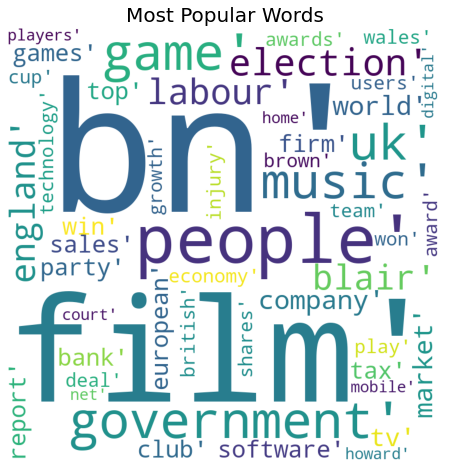

In [26]:
# Using wordcloud as visualisation tool

plt.rcParams['figure.figsize'] = (8, 8)

wordcloud = WordCloud(background_color = 'white', width = 800,  height = 800, max_words = 50).generate(str(keywords))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words',fontsize = 20)
plt.show()

#### Encode keywords

In [27]:
keywords_final = np.array(keywordsdf)

In [28]:
te = TransactionEncoder()
data_encoded = te.fit_transform(keywords_final)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)
data_encoded.shape

(2225, 1196)

In [29]:
data_encoded

,ability,able,academy,access,according,account,accounts,accused,act,action,...,world,worldwide,worth,writing,written,wrong,xbox,york,yukos,zealand
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
frequent_itemsets=apriori(data_encoded, min_support = 0.01, use_colnames = True)

In [31]:
frequent_itemsets.sort_values('support', ascending= False, inplace= True)
frequent_itemsets

,support,itemsets
26,0.067865,(bn)
100,0.064270,(film)
112,0.054831,(game)
201,0.054831,(people)
119,0.048090,(government)
...,...,...
84,0.010337,(drug)
316,0.010337,(welsh)
82,0.010337,(don)
80,0.010337,(disaster)


In [32]:
frequent_itemsets[['support']].describe()

,support
count,353.000000
mean,0.016440
std,0.008093
min,0.010337
25%,0.011685
50%,0.013933
75%,0.017978
max,0.067865


#### Confidence

In [33]:
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.045843,0.047191,0.025169,0.549020,11.633987,0.023005,2.112750
1,(labour),(election),0.047191,0.045843,0.025169,0.533333,11.633987,0.023005,2.044623
2,(labour),(blair),0.047191,0.040000,0.018427,0.390476,9.761905,0.016539,1.575000
3,(blair),(labour),0.040000,0.047191,0.018427,0.460674,9.761905,0.016539,1.766667
4,(labour),(party),0.047191,0.035056,0.017978,0.380952,10.866911,0.016323,1.558755
5,(party),(labour),0.035056,0.047191,0.017978,0.512821,10.866911,0.016323,1.955766
6,(chancellor),(brown),0.020225,0.030562,0.017528,0.866667,28.357843,0.016910,7.270787
7,(brown),(chancellor),0.030562,0.020225,0.017528,0.573529,28.357843,0.016910,2.297404
8,(economy),(growth),0.031461,0.030112,0.015281,0.485714,16.130064,0.014334,1.885893
9,(growth),(economy),0.030112,0.031461,0.015281,0.507463,16.130064,0.014334,1.966428


In [34]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,"(chancellor, labour)",(brown),0.010787,0.030562,0.010337,0.958333,31.357230,0.010007,23.266517
48,"(phone, phones)",(mobile),0.011236,0.028764,0.010337,0.920000,31.984375,0.010014,12.140449
6,(chancellor),(brown),0.020225,0.030562,0.017528,0.866667,28.357843,0.016910,7.270787
14,(phones),(mobile),0.016180,0.028764,0.013933,0.861111,29.937066,0.013467,6.992899
10,(films),(film),0.018876,0.064270,0.015281,0.809524,12.595738,0.014068,4.912584
25,(robinson),(england),0.014831,0.036404,0.011685,0.787879,21.642349,0.011145,4.542665
39,"(labour, brown)",(chancellor),0.013933,0.020225,0.010337,0.741935,36.684588,0.010055,3.796629
49,"(mobile, phone)",(phones),0.013933,0.016180,0.010337,0.741935,45.855735,0.010112,3.812303
47,"(mobile, phones)",(phone),0.013933,0.024270,0.010337,0.741935,30.570490,0.009999,3.780955
42,(oscar),(film),0.013933,0.064270,0.010337,0.741935,11.544101,0.009442,3.625955


<AxesSubplot:>

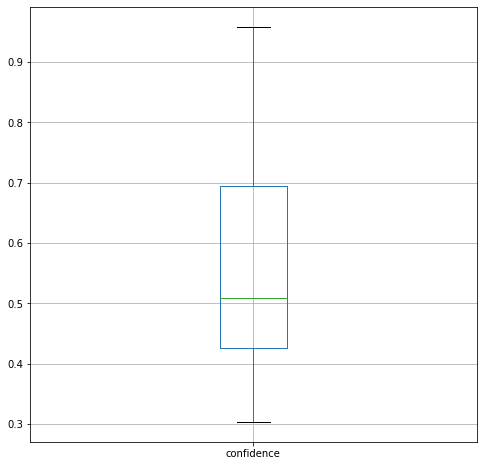

In [35]:
rules_c[['confidence']].boxplot()

#### Lift

In [36]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(labour),0.045843,0.047191,0.025169,0.549020,11.633987,0.023005,2.112750
1,(labour),(election),0.047191,0.045843,0.025169,0.533333,11.633987,0.023005,2.044623
2,(labour),(blair),0.047191,0.040000,0.018427,0.390476,9.761905,0.016539,1.575000
3,(blair),(labour),0.040000,0.047191,0.018427,0.460674,9.761905,0.016539,1.766667
4,(labour),(party),0.047191,0.035056,0.017978,0.380952,10.866911,0.016323,1.558755
5,(party),(labour),0.035056,0.047191,0.017978,0.512821,10.866911,0.016323,1.955766
6,(chancellor),(brown),0.020225,0.030562,0.017528,0.866667,28.357843,0.016910,7.270787
7,(brown),(chancellor),0.030562,0.020225,0.017528,0.573529,28.357843,0.016910,2.297404
8,(economy),(growth),0.031461,0.030112,0.015281,0.485714,16.130064,0.014334,1.885893
9,(growth),(economy),0.030112,0.031461,0.015281,0.507463,16.130064,0.014334,1.966428


In [37]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,(phones),"(mobile, phone)",0.016180,0.013933,0.010337,0.638889,45.855735,0.010112,2.730648
66,"(mobile, phone)",(phones),0.013933,0.016180,0.010337,0.741935,45.855735,0.010112,3.812303
52,"(labour, brown)",(chancellor),0.013933,0.020225,0.010337,0.741935,36.684588,0.010055,3.796629
53,(chancellor),"(labour, brown)",0.020225,0.013933,0.010337,0.511111,36.684588,0.010055,2.016956
68,(mobile),"(phone, phones)",0.028764,0.011236,0.010337,0.359375,31.984375,0.010014,1.543437
65,"(phone, phones)",(mobile),0.011236,0.028764,0.010337,0.920000,31.984375,0.010014,12.140449
50,"(chancellor, labour)",(brown),0.010787,0.030562,0.010337,0.958333,31.357230,0.010007,23.266517
55,(brown),"(chancellor, labour)",0.030562,0.010787,0.010337,0.338235,31.357230,0.010007,1.494811
69,(phone),"(mobile, phones)",0.024270,0.013933,0.010337,0.425926,30.570490,0.009999,1.717666
64,"(mobile, phones)",(phone),0.013933,0.024270,0.010337,0.741935,30.570490,0.009999,3.780955


<AxesSubplot:>

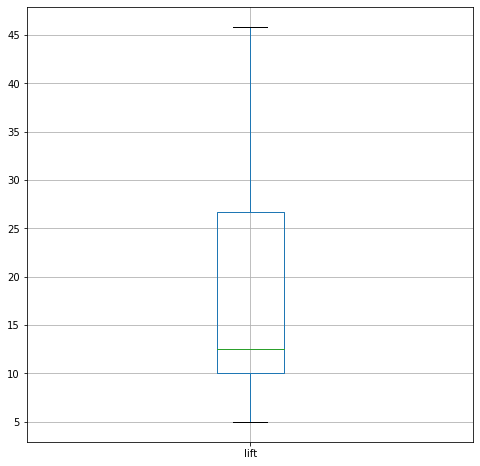

In [38]:
rules_l[['lift']].boxplot()

#### Lift and Confidence

In [39]:
rules_c[(rules_c['lift'] >= 5) & (rules_c['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,"(chancellor, labour)",(brown),0.010787,0.030562,0.010337,0.958333,31.357230,0.010007,23.266517
48,"(phone, phones)",(mobile),0.011236,0.028764,0.010337,0.920000,31.984375,0.010014,12.140449
6,(chancellor),(brown),0.020225,0.030562,0.017528,0.866667,28.357843,0.016910,7.270787
14,(phones),(mobile),0.016180,0.028764,0.013933,0.861111,29.937066,0.013467,6.992899
10,(films),(film),0.018876,0.064270,0.015281,0.809524,12.595738,0.014068,4.912584
25,(robinson),(england),0.014831,0.036404,0.011685,0.787879,21.642349,0.011145,4.542665
39,"(labour, brown)",(chancellor),0.013933,0.020225,0.010337,0.741935,36.684588,0.010055,3.796629
49,"(mobile, phone)",(phones),0.013933,0.016180,0.010337,0.741935,45.855735,0.010112,3.812303
47,"(mobile, phones)",(phone),0.013933,0.024270,0.010337,0.741935,30.570490,0.009999,3.780955
42,(oscar),(film),0.013933,0.064270,0.010337,0.741935,11.544101,0.009442,3.625955


# Problem2

## 3. Classification Modeling

In [2]:
from statistics import mean

def classification_score(x,y,model,cv=3): #CV Constant 3   
    # Create StratifiedKFold object.
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=1)
    lst_accu_stratified = []

    lst_acc_train =[]
    lst_acc_test =[]

    for train_index, test_index in skf.split(x, y):
        x_train_fold, x_test_fold = x[train_index], x[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]



        model.fit(x_train_fold, y_train_fold)

        y_pred_train = model.predict(x_train_fold)
        y_pred_test = model.predict(x_test_fold)

        lst_acc_train.append(accuracy_score(y_train_fold, y_pred_train))
        lst_acc_test.append(accuracy_score(y_test_fold, y_pred_test))
        lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))


    avg_train = sum(lst_acc_train)/len(lst_acc_train)*100
    avg_test= sum(lst_acc_test)/len(lst_acc_test)*100

    # Print the output

    print("---- Train ----")
    print("Training Accuracy:{0:.2f}".format(avg_train))
    print("---- Test ----")
    print("Test Accuracy:{0:.2f}".format(avg_test))



    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:',
          mean(lst_accu_stratified)*100, '%')


    return()

In [3]:
text_counts = sparse.load_npz("bagword.npz")

In [4]:
text_tfidf = sparse.load_npz("tfidf.npz")

In [5]:
dat = pd.read_csv("BBC-text-export.csv")

### 3.1 Sample the data

In [6]:
#BoW
x = text_counts.toarray()
y = dat['category'].map( {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4} ).astype(int)

In [7]:
# TFIDF
x2 = text_tfidf.toarray()
y2 = dat['category'].map( {'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4} ).astype(int)

In [8]:
# 80% of input for training, 30% for testing trained model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) #BoW

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=100) #TFIDF

### 3.2 Build the Model(s)

#### Use word counts (BoW) as model input

In [47]:
lr = LogisticRegression(C=0.001)
lr_model = lr.fit(x_train,y_train)
lr_y_pred =lr.predict(x)

lr_score = lr.score(x_test, y_test)
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)

print("Test score: {:.4f}".format(lr_score))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.9559
Mean cross-validation accuracy: 0.9423


In [48]:
svm = SVC(C=0.001)
svm_model = svm.fit(x_train,y_train)
svm_y_pred =svm.predict(x)

svm_score = svm.score(x_test, y_test)
cv_scores = cross_val_score(svm, x_train, y_train, cv=5)

print("Test score: {:.4f}".format(svm_score))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.1843
Mean cross-validation accuracy: 0.2068


#### Use TF-IDF matrix as model input

In [49]:
lr_model2 = lr.fit(x2_train, y2_train)
lr_y_pred2 =lr.predict(x2)

lr_score2 = lr.score(x2_test, y2_test)
cv_scores = cross_val_score(lr, x2_train, y2_train, cv=5)

print("Test score: {:.4f}".format(lr_score2))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.1919
Mean cross-validation accuracy: 0.2092


In [64]:
svm = SVC(kernel="linear", C=0.001)
svm_model2 = svm.fit(x2_train,y2_train)
svm_y_pred2 =svm.predict(x2)

svm_score2 = svm.score(x2_test, y2_test)
cv_scores = cross_val_score(svm, x2_train, y2_train, cv=5)

print("Test score: {:.4f}".format(svm_score2))
print("Mean cross-validation accuracy: {:.4}".format(np.mean(cv_scores)))

Test score: 0.1843
Mean cross-validation accuracy: 0.2068


### 3.3 Evaluate and Improve the Model(s)

#### Logistic Regression Model

In [51]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], "penalty":["l1","l2"]} # Larger C more relaxed, smaller C stronger regularlization
grid  = GridSearchCV(LogisticRegression(), param_grid, cv=5) # Logistic regression

In [52]:
grid.fit(x_train,y_train) # text count
print("Best parameters: ", grid.best_params_)

C:\Users\shani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [53]:
grid.fit(x2_train,y2_train) # TF IDF matrix
print("Best parameters: ", grid.best_params_)

C:\Users\shani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\shani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Best parameters:  {'C': 10, 'penalty': 'l2'}


In [22]:
#BoW
lr = LogisticRegression(C=10, penalty="l2")

lr_model = lr.fit(x_train,y_train)
lr_y_pred =lr.predict(x)

lr_score = lr.score(x_test, y_test)
cv_scores = cross_val_score(lr, x_train, y_train, cv=5)

print("Test score: {:.4f}".format(lr_score))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.9731
Mean cross-validation accuracy: 0.9638


In [23]:
# tf idf
lr_model2 = lr.fit(x2_train, y2_train)
lr_y_pred2 =lr.predict(x2)

lr_score2 = lr.score(x2_test, y2_test)
cv_scores = cross_val_score(lr, x2_train, y2_train, cv=5)

print("Test score: {:.4f}".format(lr_score2))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.9789
Mean cross-validation accuracy: 0.9679


In [24]:
# LR BoW
classification_score(x,y,lr,cv=5)
print("\n" + classification_report(y, lr_y_pred))

---- Train ----
Training Accuracy:100.00
---- Test ----
Test Accuracy:97.18
List of possible accuracy: [0.9711815561959655, 0.9740634005763689, 0.9798270893371758, 0.9654178674351584, 0.968299711815562]

Maximum Accuracy That can be obtained from this model is: 97.98270893371757 %

Minimum Accuracy: 96.54178674351584 %

Overall Accuracy: 97.1757925072046 %

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       347
           1       0.98      1.00      0.99       347
           2       0.99      0.99      0.99       347
           3       1.00      1.00      1.00       347
           4       1.00      0.98      0.99       347

    accuracy                           0.99      1735
   macro avg       0.99      0.99      0.99      1735
weighted avg       0.99      0.99      0.99      1735



C:\Users\shani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


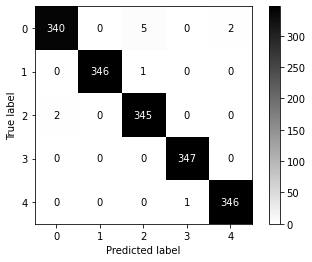

In [34]:
plot_confusion_matrix(lr, x, y, cmap=plt.cm.binary)  
plt.show()

#Reference 'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4

In [25]:
# LR TFIDF
classification_score(x2,y2,lr,cv=5)
print("\n" + classification_report(y, lr_y_pred2))

---- Train ----
Training Accuracy:100.00
---- Test ----
Test Accuracy:97.41
List of possible accuracy: [0.968299711815562, 0.9769452449567724, 0.9798270893371758, 0.9711815561959655, 0.9740634005763689]

Maximum Accuracy That can be obtained from this model is: 97.98270893371757 %

Minimum Accuracy: 96.82997118155619 %

Overall Accuracy: 97.40634005763688 %

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       347
           1       0.99      1.00      0.99       347
           2       0.99      0.99      0.99       347
           3       1.00      1.00      1.00       347
           4       0.99      0.99      0.99       347

    accuracy                           0.99      1735
   macro avg       0.99      0.99      0.99      1735
weighted avg       0.99      0.99      0.99      1735



C:\Users\shani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


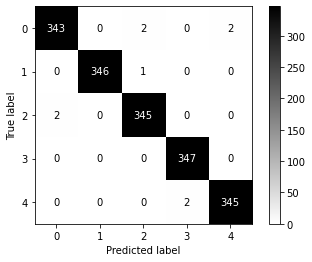

In [35]:
plot_confusion_matrix(lr_model2, x2, y, cmap=plt.cm.binary)  
plt.show()

#Reference 'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4

#### Support Vector Machine Model

In [15]:
svm_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [1,0.1,0.01,0.001]}
grid2  = GridSearchCV(SVC(), svm_param_grid, refit=True, cv=5)

In [16]:
grid2.fit(x_train,y_train) # text count / BoW
print("Best parameters: ", grid2.best_params_)

Best parameters:  {'C': 10, 'gamma': 0.001}


In [17]:
grid2.fit(x2_train,y2_train) # TF IDF matrix
print("Best parameters: ", grid2.best_params_)

Best parameters:  {'C': 10, 'gamma': 0.1}


In [18]:
# BoW
svm = SVC(C=10, gamma=0.001)
svm_model = svm.fit(x_train,y_train)
svm_y_pred =svm.predict(x)

svm_score = svm.score(x_test, y_test)
cv_scores = cross_val_score(svm, x_train, y_train, cv=5)

print("Test score: {:.4f}".format(svm_score))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.9616
Mean cross-validation accuracy: 0.9547


In [19]:
# tf idf
svm_tfidf = SVC( C=10, gamma = 0.1)
svm_model2 = svm_tfidf.fit(x2_train,y2_train)
svm_y_pred2 =svm_tfidf.predict(x2)

svm_score2 = svm_tfidf.score(x2_test, y2_test)
cv_scores = cross_val_score(svm_tfidf, x2_train, y2_train, cv=5)

print("Test score: {:.4f}".format(svm_score2))
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(cv_scores)))

Test score: 0.9827
Mean cross-validation accuracy: 0.9736


In [20]:
# SVM BoW
classification_score(x,y,svm,cv=5)
print("\n" + classification_report(y, svm_y_pred))

---- Train ----
Training Accuracy:100.00
---- Test ----
Test Accuracy:96.43
List of possible accuracy: [0.968299711815562, 0.9711815561959655, 0.9711815561959655, 0.9510086455331412, 0.9596541786743515]

Maximum Accuracy That can be obtained from this model is: 97.11815561959655 %

Minimum Accuracy: 95.10086455331412 %

Overall Accuracy: 96.42651296829972 %

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       347
           1       0.98      0.99      0.99       347
           2       0.99      0.99      0.99       347
           3       1.00      0.99      1.00       347
           4       0.98      0.98      0.98       347

    accuracy                           0.99      1735
   macro avg       0.99      0.99      0.99      1735
weighted avg       0.99      0.99      0.99      1735



C:\Users\shani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


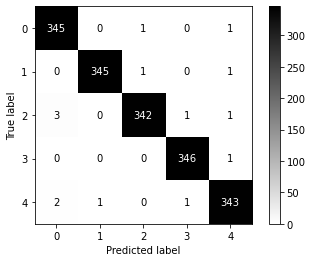

In [37]:
plot_confusion_matrix(svm, x, y, cmap=plt.cm.binary)  
plt.show()

#Reference 'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4

In [21]:
# SVM TFIDF
classification_score(x2,y2,svm_tfidf,cv=5)
print("\n" + classification_report(y, svm_y_pred2))

---- Train ----
Training Accuracy:100.00
---- Test ----
Test Accuracy:97.23
List of possible accuracy: [0.9654178674351584, 0.968299711815562, 0.9827089337175793, 0.9740634005763689, 0.9711815561959655]

Maximum Accuracy That can be obtained from this model is: 98.27089337175792 %

Minimum Accuracy: 96.54178674351584 %

Overall Accuracy: 97.23342939481267 %

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       347
           1       0.99      1.00      0.99       347
           2       0.99      1.00      0.99       347
           3       1.00      1.00      1.00       347
           4       0.99      0.99      0.99       347

    accuracy                           0.99      1735
   macro avg       0.99      0.99      0.99      1735
weighted avg       0.99      0.99      0.99      1735



C:\Users\shani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


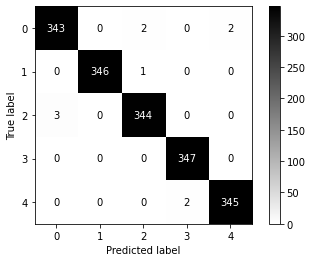

In [36]:
plot_confusion_matrix(svm_tfidf, x2, y, cmap=plt.cm.binary)  
plt.show()

#Reference 'sport': 0, 'business': 1, 'politics': 2, 'tech': 3, 'entertainment': 4